In [1]:
import json
from fuzzywuzzy import process
import recommendation_functions as rec

Your favorite movie: Beauty and the Beast
Your exploration percentage: 2

Recommended Movies:
- Toy Story 2 (100)
- Toy Story (100)
- Finding Nemo (99)
- Toy Story 3 (98)
- Inside Out (98)


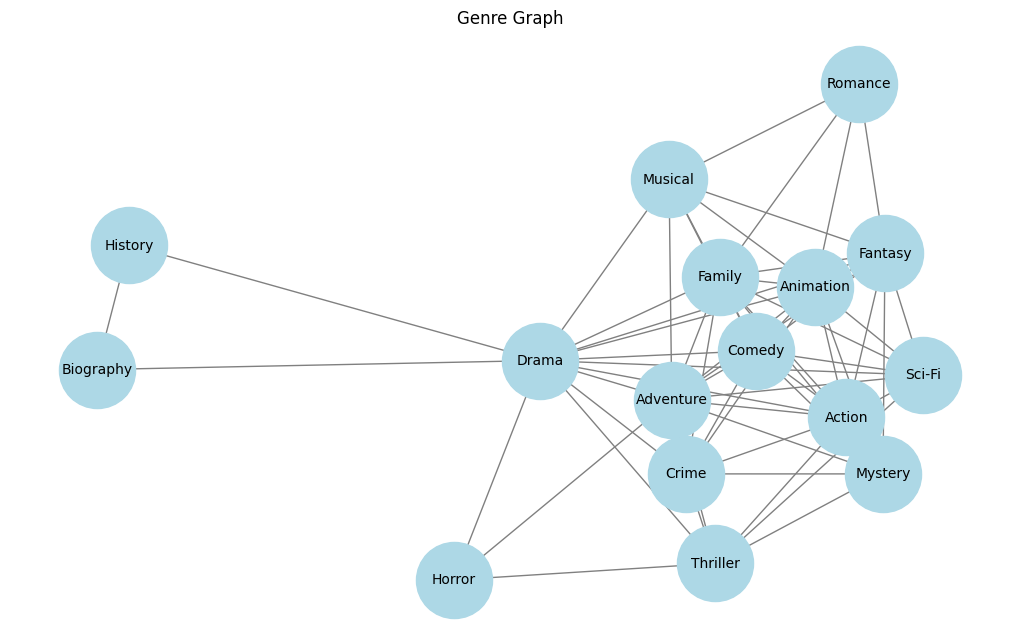

In [6]:
# Sample movie database
with open("ratings_genres.txt", "r") as rating_genre:
    movie_db = json.load(rating_genre)

# Taking user input
fav_movie = input("Enter your favorite movie: ")
# Use the fuzzywuzzy library to pick out the closest movie title. Grabs best match and string relating to it
fuzzed_fav_movie = process.extract(fav_movie, movie_db.keys())[0][0]
try:
    exploration_pct = int(input("Enter exploration percentage (0-100): "))
    if exploration_pct < 0 or exploration_pct > 100:
        raise ValueError("Exploration percentage must be between 0 and 100.")
    
    recommendations = rec.get_movie_recommendations(movie_db, fuzzed_fav_movie, exploration_pct)
    
    if recommendations:
        print(f"Your favorite movie: {fuzzed_fav_movie}\nYour exploration percentage: {exploration_pct}")
        print("\nRecommended Movies:")
        for movie, rating in recommendations:
            print(f"- {movie} ({rating})")
    else:
        print("No recommendations available.")

    # Display genre graph
    genre_graph = rec.build_genre_graph(movie_db)
    rec.display_genre_graph(genre_graph)

except ValueError as e:
    print(f"Invalid input: {e}")